# Plotting Review

*A review of the major visualization methods used, their attributes, and their pros and cons.*

1. Datasets
    * Text - Hamlet
2. Histogram
    * Text - `plt.bar()`, `plt.barh()`

In [99]:
# We matplotlib to draw things on the notebook, instead of on a separate window.
%matplotlib inline 

import numpy as np # numpy = fast numerical programming library
import scipy as sp # scipy = stats functions, amongst other things
import matplotlib as mpl # matplotlib
import matplotlib.cm as cm # cm = colormaps
import matplotlib.pyplot as plt # plt = pyplot, easy command line functions for plotting
import pandas as pd

# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
# display.colheader_justify = justify dataframe columns
# display.precision = floating point precision of output

# seaborn = matplotlib, adds more plots and makes shit pretty
import seaborn as sns

## 1.1 Datasets

### The text of Hamlet

In [60]:
# Lab1
with open("hamlet.txt") as hamletfile:
    hamlettext=hamletfile.read()
    hamlettokens = [s.strip('.').strip(';').lower() for s in hamlettext.split()] # quick cleaning
    print "Hamlet has %d words." % len(hamlettokens)

Hamlet has 31659 words.


In [61]:
print hamlettext[:50]

﻿XXXX
HAMLET, PRINCE OF DENMARK

by William S


In [62]:
hamlettokens[:10]

['\xef\xbb\xbfxxxx',
 'hamlet,',
 'prince',
 'of',
 'denmark',
 'by',
 'william',
 'shakespeare',
 'persons',
 'represented']

# 2. Basic visualizations

## 2.1 Histogram

Plot the frequency of the top `k` most common words in Hamlet.

In [110]:
# Use the Counter to count word frequency
from collections import Counter
import random

# Top k words
k = 20

# Gather top k words
ham_counter = Counter(random.sample(hamlettokens, len(hamlettokens)))
ham_popular_words = sorted(dict(ham_counter), key = ham_counter.get, reverse = True)[:k]
ham_popular_counts = [ham_counter[x] for x in ham_popular_words]
zip(ham_popular_words, ham_popular_counts)

[('the', 1136),
 ('and', 943),
 ('to', 723),
 ('of', 668),
 ('a', 527),
 ('i', 520),
 ('my', 512),
 ('you', 443),
 ('in', 428),
 ('ham', 358),
 ('it', 353),
 ('that', 344),
 ('is', 326),
 ('his', 296),
 ('not', 282),
 ('with', 265),
 ('this', 257),
 ('your', 241),
 ('for', 239),
 ('but', 228)]

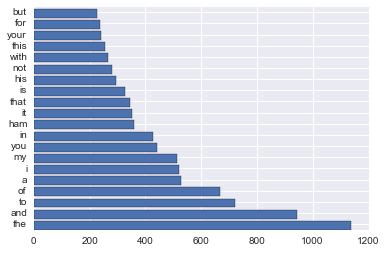

In [109]:
# Plot histogram using matplotlib bar()
indexes = np.arange(len(ham_popular_words))
plt.barh(indexes, ham_popular_counts) # barh is a horizontal bar plot
plt.yticks(indexes + 0.5, ham_popular_words)
plt.show()